In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors

In [2]:
arquivos = ['2017-04-30-000000.l3.grid-microplastic.a10.d10.nc4','2017-05-31-000000.l3.grid-microplastic.a10.d10.nc4','2017-06-30-000000.l3.grid-microplastic.a10.d10.nc4', '2017-07-31-000000.l3.grid-microplastic.a10.d10.nc4', '2017-08-31-000000.l3.grid-microplastic.a10.d10.nc4', '2017-09-30-000000.l3.grid-microplastic.a10.d10.nc4', '2017-10-31-000000.l3.grid-microplastic.a10.d10.nc4', '2017-11-30-000000.l3.grid-microplastic.a10.d10.nc4', '2017-12-31-000000.l3.grid-microplastic.a10.d10.nc4', '2018-01-31-000000.l3.grid-microplastic.a10.d10.nc4', '2018-02-28-000000.l3.grid-microplastic.a10.d10.nc4', '2018-03-31-000000.l3.grid-microplastic.a10.d10.nc4', '2018-04-30-000000.l3.grid-microplastic.a10.d10.nc4', '2018-05-31-000000.l3.grid-microplastic.a10.d10.nc4','2018-06-30-000000.l3.grid-microplastic.a10.d10.nc4','2018-07-31-000000.l3.grid-microplastic.a10.d10.nc4', '2018-08-31-000000.l3.grid-microplastic.a10.d10.nc4', '2018-09-25-000000.l3.grid-microplastic.a10.d10.nc4']
ds = xr.open_mfdataset(arquivos, combine='by_coords')
ds

<xarray.Dataset>
Dimensions:           (time: 542, lat: 297, lon: 1440)
Coordinates:
  * lat               (lat) float64 37.0 36.75 36.5 36.25 ... -36.5 -36.75 -37.0
  * lon               (lon) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time              (time) datetime64[ns] 2017-04-02 2017-04-03 ... 2018-09-25
Data variables:
    MP_concentration  (time, lat, lon) float64 dask.array<chunksize=(29, 297, 1440), meta=np.ndarray>
    stdev_MP_samples  (time, lat, lon) float64 dask.array<chunksize=(29, 297, 1440), meta=np.ndarray>
    num_MP_samples    (time, lat, lon) float64 dask.array<chunksize=(29, 297, 1440), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                        CF-1.6, ACDD-1.3, ISO-8601
    standard_name_vocabulary:           CF Standard Name Table v30
    project:                            CYGNSS
    summary:                            CYGNSS is a NASA Earth Venture missio...
    program:                            CYGNSS
    references:                         Ruf, C., P. Chang, M.P. Clarizia, S. ...
    ...                                 ...
    input_l2_wind_speed_matchup_var:    gdas_wind_speed
    input_l2_quality_flag_var:          fds_sample_flag
    NCO:                                4.6.1
    NCProperties:                       version=1|netcdflibversion=4.6.1|hdf5...
    history:                            Generated on 11-Oct-2021 21:12:55; ma...
    history_json:                       [{"$schema":"https:\/\/harmony.earthd...

In [3]:
mp = ds['MP_concentration']

In [4]:
mp

<xarray.DataArray 'MP_concentration' (time: 542, lat: 297, lon: 1440)>
dask.array<concatenate, shape=(542, 297, 1440), dtype=float64, chunksize=(31, 297, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 37.0 36.75 36.5 36.25 ... -36.25 -36.5 -36.75 -37.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time     (time) datetime64[ns] 2017-04-02 2017-04-03 ... 2018-09-25
Attributes:
    long_name:     Microplastic Concentration
    units:         count km-2
    comment:       Near-surface ocean microplastic number density geometrical...
    origname:      MP_concentration
    fullnamepath:  /MP_concentration

In [5]:
mp.time

<xarray.DataArray 'time' (time: 542)>
array(['2017-04-02T00:00:00.000000000', '2017-04-03T00:00:00.000000000',
       '2017-04-04T00:00:00.000000000', ..., '2018-09-23T00:00:00.000000000',
       '2018-09-24T00:00:00.000000000', '2018-09-25T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-04-02 2017-04-03 ... 2018-09-25
Attributes:
    long_name:      Time
    comment:        Timestamp coordinate at the center of the 30 day bin, at ...
    standard_name:  time
    origname:       time
    fullnamepath:   /time

In [6]:
mp.sel(time=slice('2017-04-02T00:00:00', '2018-09-25T00:00:00'))
ds.sel(time=slice('2017-04-02T00:00:00', '2018-09-25T00:00:00'))

<xarray.Dataset>
Dimensions:           (time: 542, lat: 297, lon: 1440)
Coordinates:
  * lat               (lat) float64 37.0 36.75 36.5 36.25 ... -36.5 -36.75 -37.0
  * lon               (lon) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time              (time) datetime64[ns] 2017-04-02 2017-04-03 ... 2018-09-25
Data variables:
    MP_concentration  (time, lat, lon) float64 dask.array<chunksize=(29, 297, 1440), meta=np.ndarray>
    stdev_MP_samples  (time, lat, lon) float64 dask.array<chunksize=(29, 297, 1440), meta=np.ndarray>
    num_MP_samples    (time, lat, lon) float64 dask.array<chunksize=(29, 297, 1440), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                        CF-1.6, ACDD-1.3, ISO-8601
    standard_name_vocabulary:           CF Standard Name Table v30
    project:                            CYGNSS
    summary:                            CYGNSS is a NASA Earth Venture missio...
    program:                            CYGNSS
    references:                         Ruf, C., P. Chang, M.P. Clarizia, S. ...
    ...                                 ...
    input_l2_wind_speed_matchup_var:    gdas_wind_speed
    input_l2_quality_flag_var:          fds_sample_flag
    NCO:                                4.6.1
    NCProperties:                       version=1|netcdflibversion=4.6.1|hdf5...
    history:                            Generated on 11-Oct-2021 21:12:55; ma...
    history_json:                       [{"$schema":"https:\/\/harmony.earthd...

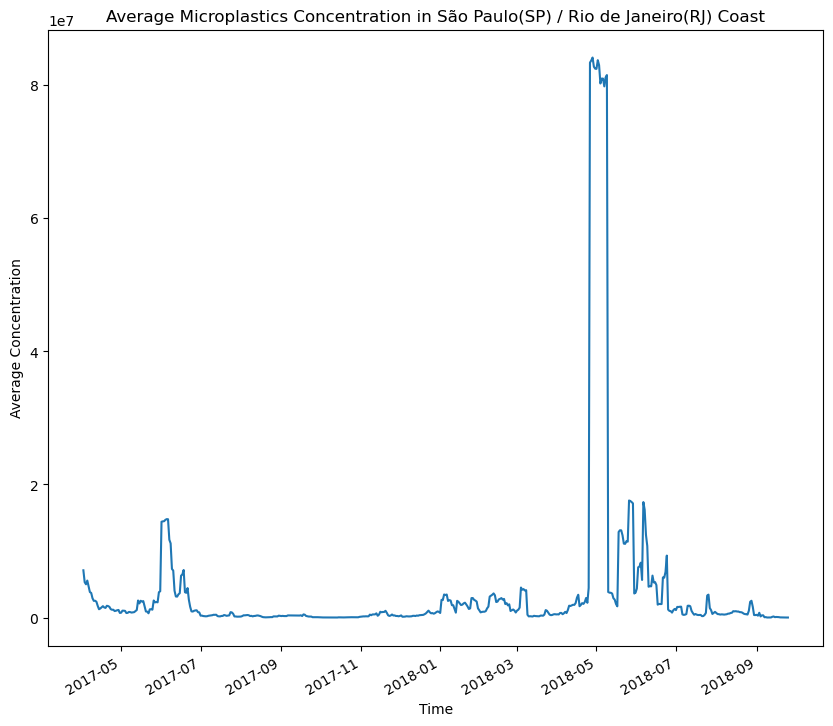

In [14]:
# Definindo a área de interesse - RJ/SP
lat_min, lat_max = -26.1871, -23.4962  # Ajuste os limites de latitude para a área desejada
lon_min, lon_max = 360 + (-47.30273), 360 + (-41.02734)  # Ajuste os limites de longitude para a área desejada

dados_area_interesse = ds.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Carregando os dados na memória
dados_area_interesse = dados_area_interesse.load()

# Verifique se os dados existem
if dados_area_interesse.MP_concentration.count() > 0:
    # Plotando os dados de concentração de microplásticos em relação ao tempo
    plt.figure(figsize=(10, 8))
    
    dados_area_interesse.MP_concentration.mean(dim=('lat', 'lon')).plot()
    plt.title('Average Microplastics Concentration in São Paulo(SP) / Rio de Janeiro(RJ) Coast')
    plt.xlabel('Time')
    plt.ylabel('Average Concentration')
    plt.show()
else:
    print("No data available for the selected area and time period.")

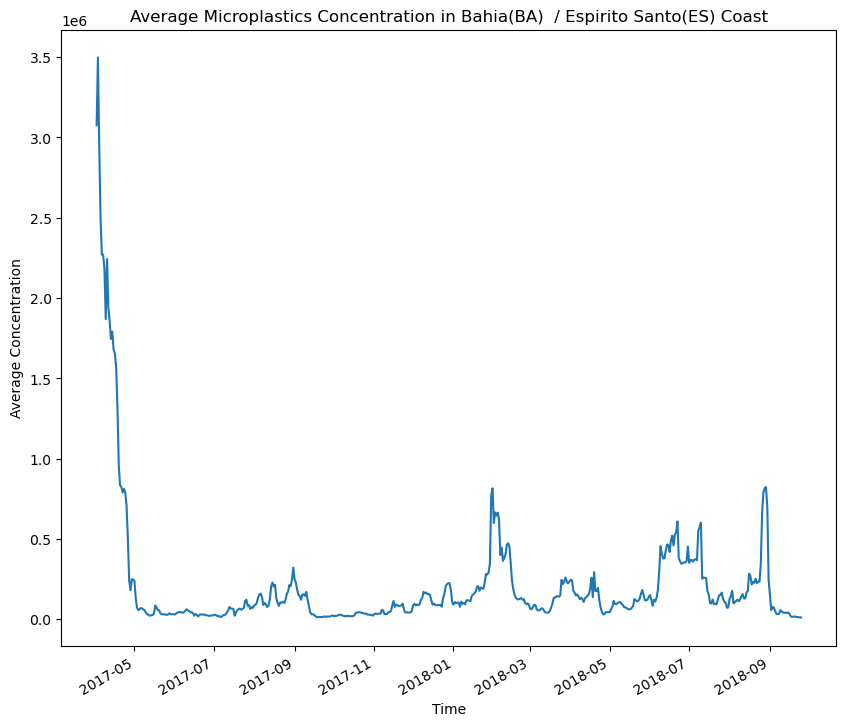

In [15]:
# Definindo a área de interesse - Bahia / Espirito Santo
lat_min, lat_max = -20.94607, -12.67993  # Ajuste os limites de latitude para a área desejada
lon_min, lon_max = 360 + (-39.30469), 360 + (-36.73828)  # Ajuste os limites de longitude para a área desejada

dados_area_interesse = ds.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Carregando os dados na memória
dados_area_interesse = dados_area_interesse.load()

# Verifique se os dados existem
if dados_area_interesse.MP_concentration.count() > 0:
    # Plotando os dados de concentração de microplásticos em relação ao tempo
    plt.figure(figsize=(10, 8))
    
    dados_area_interesse.MP_concentration.mean(dim=('lat', 'lon')).plot()
    plt.title('Average Microplastics Concentration in Bahia(BA)  / Espirito Santo(ES) Coast')
    plt.xlabel('Time')
    plt.ylabel('Average Concentration')
    plt.show()
else:
    print("No data available for the selected area and time period.")

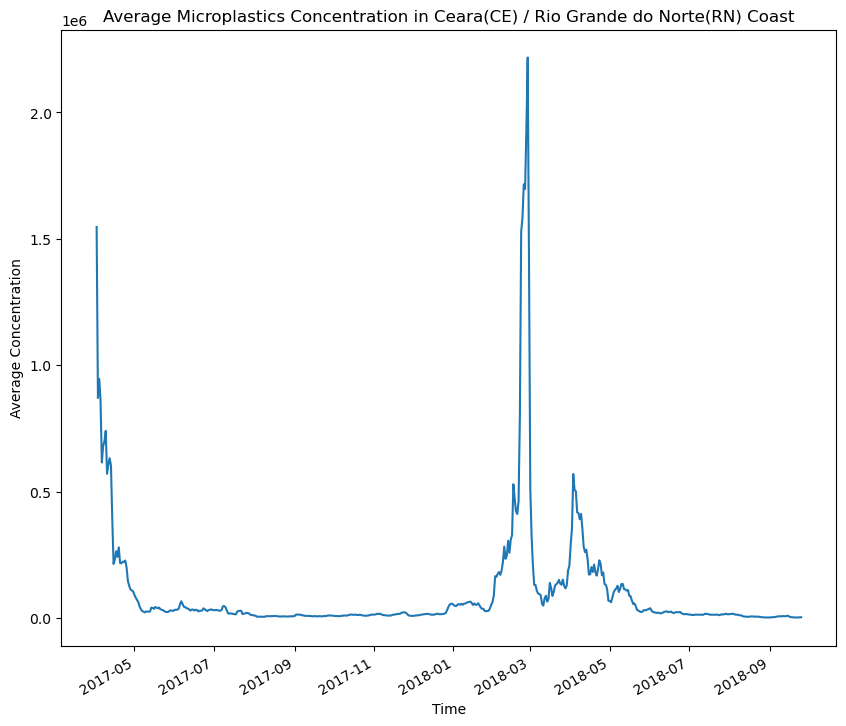

In [16]:
# Definindo a área de interesse - ceara / rio grande do norte
lat_min, lat_max = -6.30766, -1.13692  # Ajuste os limites de latitude para a área desejada
lon_min, lon_max = 360 + (-40.27148), 360 + (-30.16406)  # Ajuste os limites de longitude para a área desejada

dados_area_interesse = ds.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Carregando os dados na memória
dados_area_interesse = dados_area_interesse.load()

# Verifique se os dados existem
if dados_area_interesse.MP_concentration.count() > 0:
    # Plotando os dados de concentração de microplásticos em relação ao tempo
    plt.figure(figsize=(10, 8))
    
    dados_area_interesse.MP_concentration.mean(dim=('lat', 'lon')).plot()
    plt.title('Average Microplastics Concentration in Ceara(CE) / Rio Grande do Norte(RN) Coast')
    plt.xlabel('Time')
    plt.ylabel('Average Concentration')
    plt.show()
else:
    print("No data available for the selected area and time period.")

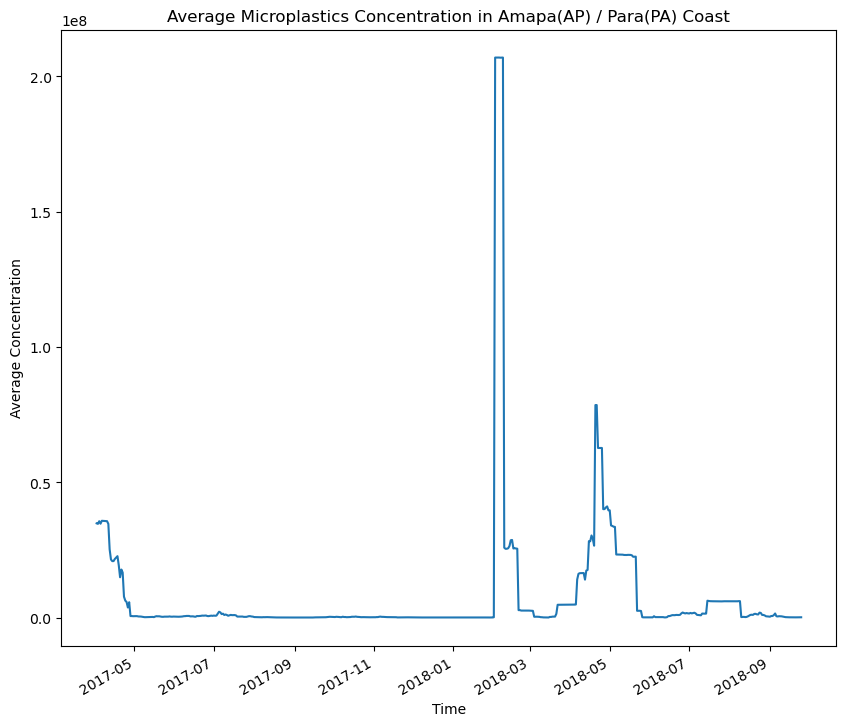

In [17]:
# Definindo a área de interesse - Amapa
lat_min, lat_max = -1.18888, 4.72054  # Ajuste os limites de latitude para a área desejada
lon_min, lon_max = 360 + (-51.60938), 360 + (-42.08203)  # Ajuste os limites de longitude para a área desejada

dados_area_interesse = ds.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Carregando os dados na memória
dados_area_interesse = dados_area_interesse.load()

# Verifique se os dados existem
if dados_area_interesse.MP_concentration.count() > 0:
    # Plotando os dados de concentração de microplásticos em relação ao tempo
    plt.figure(figsize=(10, 8))
    
    dados_area_interesse.MP_concentration.mean(dim=('lat', 'lon')).plot()
    plt.title('Average Microplastics Concentration in Amapa(AP) / Para(PA) Coast')
    plt.xlabel('Time')
    plt.ylabel('Average Concentration')
    plt.show()
else:
    print("No data available for the selected area and time period.")

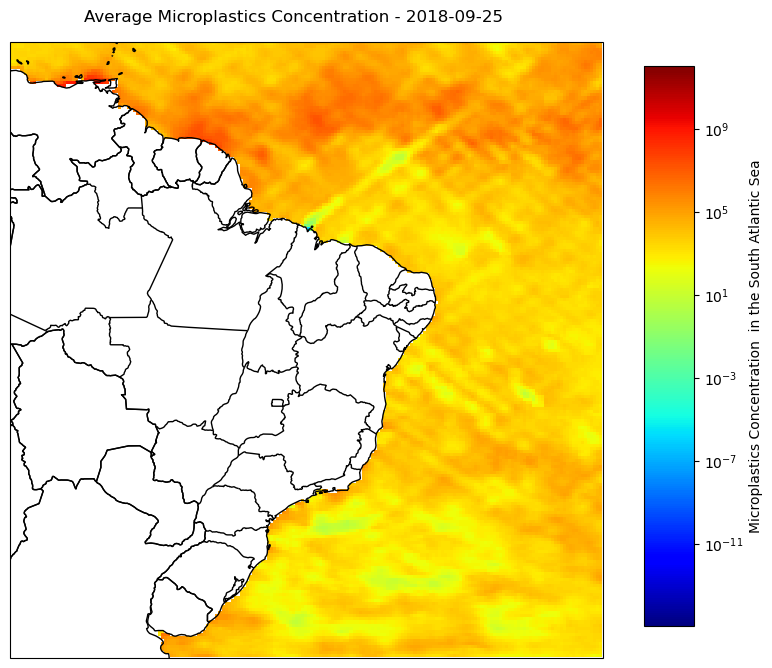

In [44]:
# mapa em video
lat_min, lat_max = -36.704, 13.84585  # Ajuste os limites de latitude para a área desejada
lon_min, lon_max = 360 + (-69.73438), 360 + (-21.09375)  # Ajuste os limites de longitude para a área desejada


dados_area_interesse = ds.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Carregando os dados na memória
dados_area_interesse = dados_area_interesse.load()

# Criando um mapa animado
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Adicionando as fronteiras dos países
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    facecolor='none')
ax.add_feature(countries, edgecolor='black')

# Adicionando as fronteiras dos estados
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='black')

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # Adicionei esta linha

def update(frame):
    ax.clear()
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    
    ax.add_feature(countries, edgecolor='black')  # Adicionei esta linha
    ax.add_feature(states_provinces, edgecolor='black')  # Adicionei esta linha
    
    pcm = ax.pcolormesh(
        dados_area_interesse.lon,
        dados_area_interesse.lat,
        dados_area_interesse.MP_concentration.isel(time=frame),
        cmap='jet',
        transform=ccrs.PlateCarree(),
        shading='auto',
        norm=colors.LogNorm(vmin=max(1e-15, dados_area_interesse.MP_concentration.min()), vmax=dados_area_interesse.MP_concentration.max())  # Modifiquei esta linha
    )

    cbar = fig.colorbar(pcm, cax=cbar_ax)  # Adicionei esta linha
    cbar.set_label('Microplastics Concentration  in the South Atlantic Sea')  # Adicionei esta linha

    fig.suptitle(f'Average Microplastics Concentration - {dados_area_interesse.time.isel(time=frame).dt.strftime("%Y-%m-%d").values}', y=0.92)  # Modifiquei esta linha

    return pcm


# Definindo o intervalo de frames
frames_to_use = range(len(dados_area_interesse.time))

# Criando a animação
ani = animation.FuncAnimation(fig, update, frames=frames_to_use, blit=False)

# Salvando o vídeo com uma duração de 50 segundos
ani.save('concentracao_microplasticos_animacao.mp4', writer='ffmpeg', fps=20, extra_args=['-vcodec', 'libx264'])

plt.show()